In [ ]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/BestOneYet.csv")

In [ ]:
df.head()

,Unnamed: 0,Optimum Time quantum,Avg Arrival Time,Max Arrival Time,Min Arrival Time,Avg Burst Time,Max Burst Time,Min Burst Time,Total Completion Time,Number of processes
0,0,12,5.368421,10,0,8.315789,12,1,158,19
1,1,12,4.176471,9,0,8.000000,12,1,136,17
2,2,15,3.866667,10,0,9.866667,15,4,148,15
3,3,13,4.764706,9,0,8.588235,13,3,146,17
4,4,14,4.421053,10,0,9.157895,14,5,174,19


#EDA

In [ ]:
lst=list(df.columns)
lst

['Unnamed: 0',
 'Optimum Time quantum',
 'Avg Arrival Time',
 'Max Arrival Time',
 'Min Arrival Time',
 'Avg Burst Time',
 'Max Burst Time',
 'Min Burst Time',
 'Total Completion Time',
 'Number of processes']

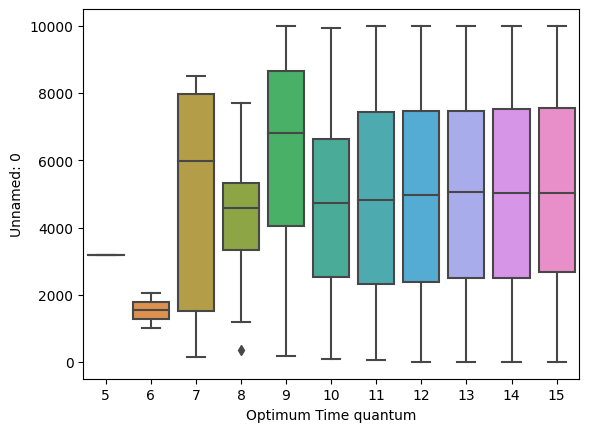

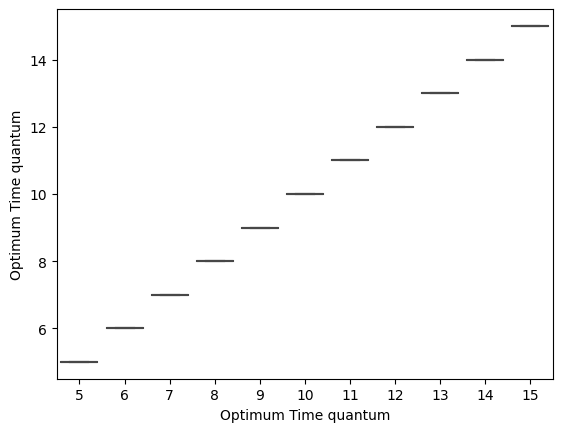

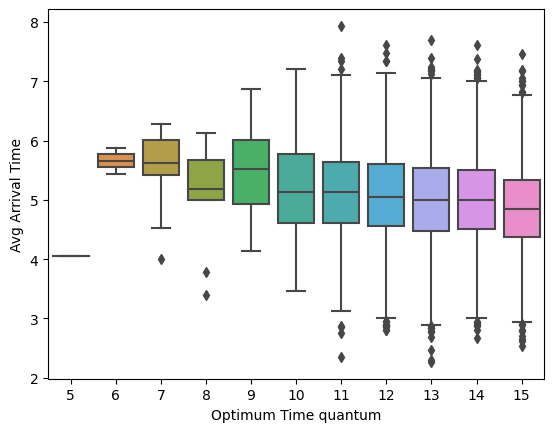

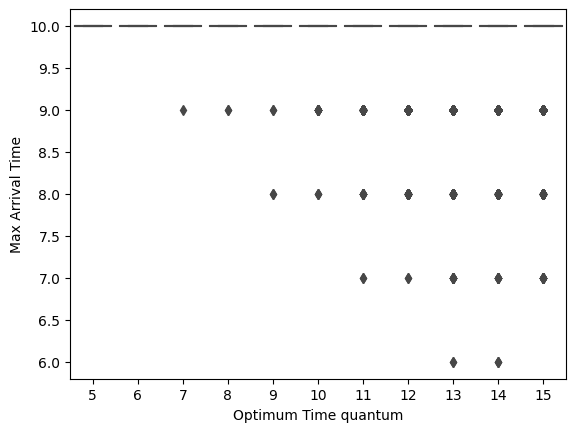

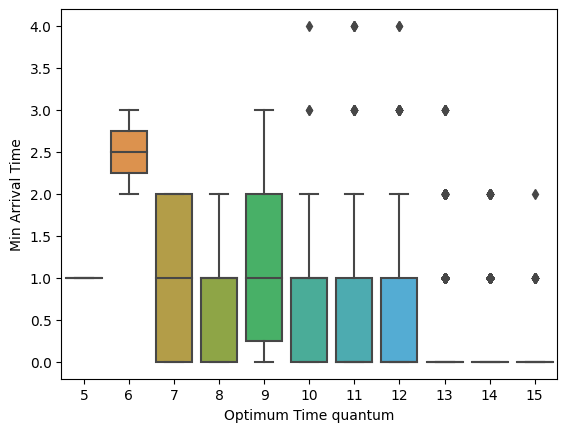

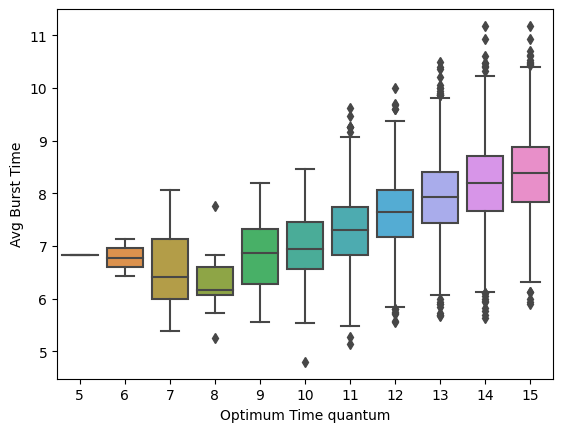

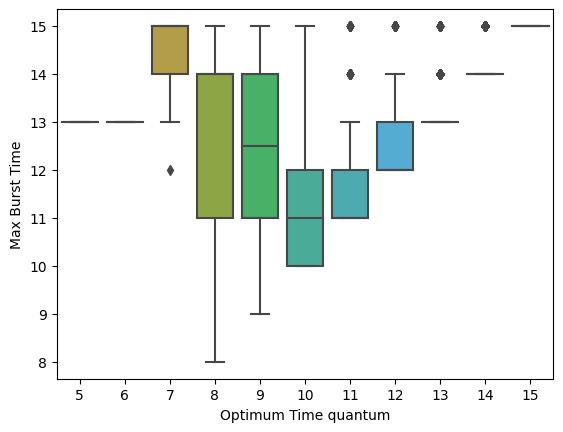

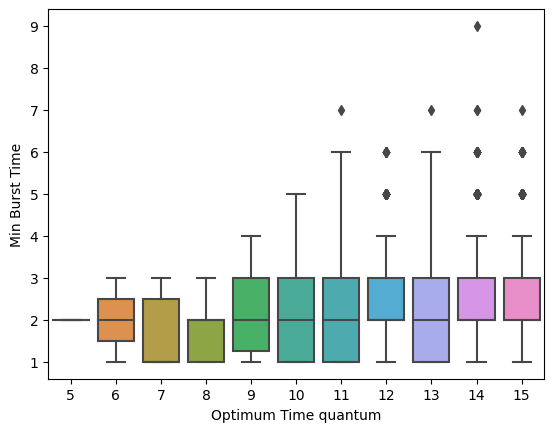

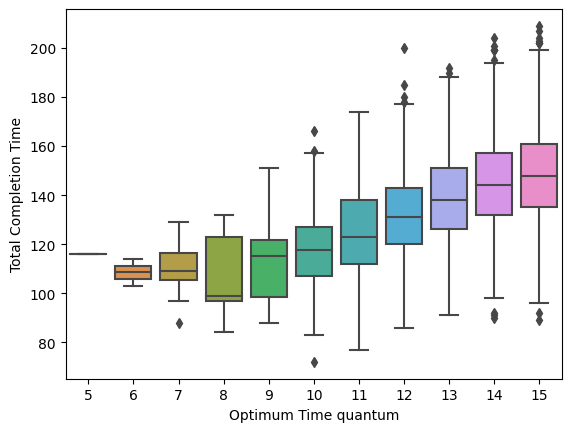

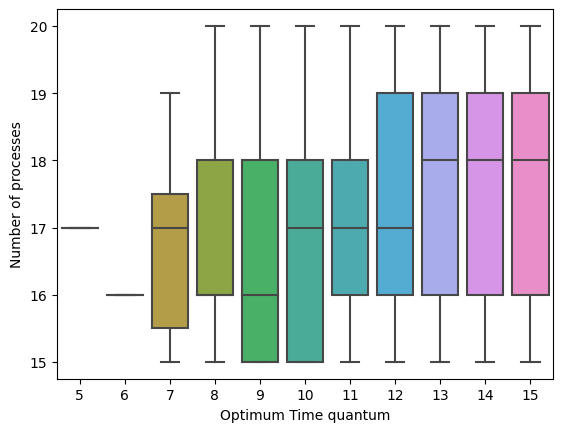

<Figure size 640x480 with 0 Axes>

In [ ]:
for i in range(len(lst)):
  sns.boxplot(data = df, x = "Optimum Time quantum", y = lst[i])
  plt.figure()

#Standardisation

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [ ]:
y = df["Optimum Time quantum"]
df = df.drop(["Optimum Time quantum", 'Unnamed: 0'], axis = "columns")

In [ ]:
scaler.fit(df)
df = scaler.transform(df)
df

array([[ 0.49094284,  0.44439792, -0.44231798, ..., -1.21784299,
         0.92862859,  0.87536424],
       [-1.05910558, -1.51157884, -0.44231798, ..., -1.21784299,
        -0.20583879, -0.30397458],
       [-1.46198397,  0.44439792, -0.44231798, ...,  1.45462352,
         0.4129616 , -1.4833134 ],
       ...,
       [ 0.22857534,  0.44439792, -0.44231798, ..., -0.32702082,
         0.3098282 ,  0.28569483],
       [ 0.44531371,  0.44439792,  1.509659  , ...,  0.56380135,
        -1.39187287, -1.4833134 ],
       [ 0.92213813,  0.44439792, -0.44231798, ...,  0.56380135,
         0.92862859,  1.46503365]])

In [ ]:
df = pd.DataFrame(df, columns = lst[2:])
df

,Avg Arrival Time,Max Arrival Time,Min Arrival Time,Avg Burst Time,Max Burst Time,Min Burst Time,Total Completion Time,Number of processes
0,0.490943,0.444398,-0.442318,0.402278,-1.447223,-1.217843,0.928629,0.875364
1,-1.059106,-1.511579,-0.442318,0.008831,-1.447223,-1.217843,-0.205839,-0.303975
2,-1.461984,0.444398,-0.442318,2.334539,1.198523,1.454624,0.412962,-1.483313
3,-0.294147,-1.511579,-0.442318,0.741722,-0.565308,0.563801,0.309828,-0.303975
4,-0.741044,0.444398,-0.442318,1.451469,0.316608,2.345446,1.753696,0.875364
...,...,...,...,...,...,...,...,...
9995,0.373068,0.444398,-0.442318,0.839441,1.198523,0.563801,0.825495,0.285695
9996,-0.946375,0.444398,-0.442318,-0.974786,0.316608,-1.217843,-0.154272,0.875364
9997,0.228575,0.444398,-0.442318,0.147266,-1.447223,-0.327021,0.309828,0.285695
9998,0.445314,0.444398,1.509659,-0.572596,1.198523,0.563801,-1.391873,-1.483313


#KNN

In [ ]:
X = df

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
pred = knn.predict(X_test)
pred

array([15, 14, 15, ..., 13, 14, 14])

In [ ]:
from sklearn.metrics import classification_report,accuracy_score
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           5       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00         6
           9       0.00      0.00      0.00        13
          10       0.23      0.25      0.24        36
          11       0.66      0.62      0.64       177
          12       0.75      0.74      0.74       458
          13       0.81      0.84      0.83       812
          14       0.88      0.88      0.88       906
          15       0.93      0.93      0.93       588

    accuracy                           0.83      3000
   macro avg       0.43      0.43      0.43      3000
weighted avg       0.82      0.83      0.83      3000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
np.round(accuracy_score(y_test,pred),3)

0.828

In [ ]:
acc_test = []
acc_train = []
diff = []
K_value = []
for i in range(1, 200):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, y_train)
  pred_test = knn.predict(X_test)
  pred_train = knn.predict(X_train)
  acc_train.append(np.round(accuracy_score(y_train,pred_train),3))
  acc_test.append(np.round(accuracy_score(y_test,pred_test),3))
  diff.append(np.round(accuracy_score(y_train,pred_train),3) - (np.round(accuracy_score(y_test,pred_test),3)))
  K_value.append(i)

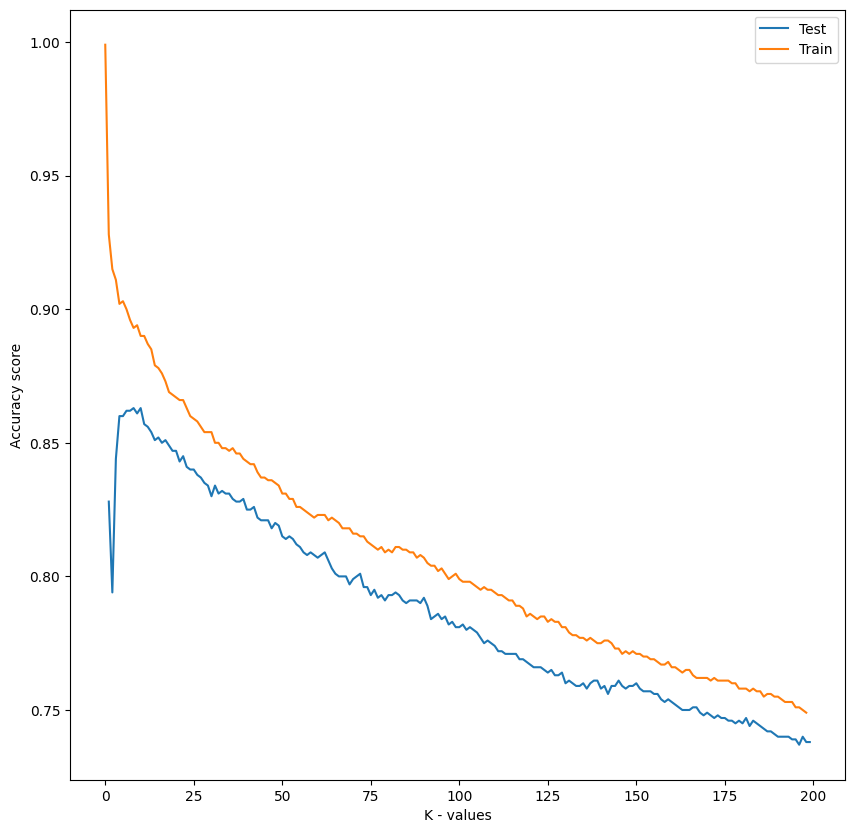

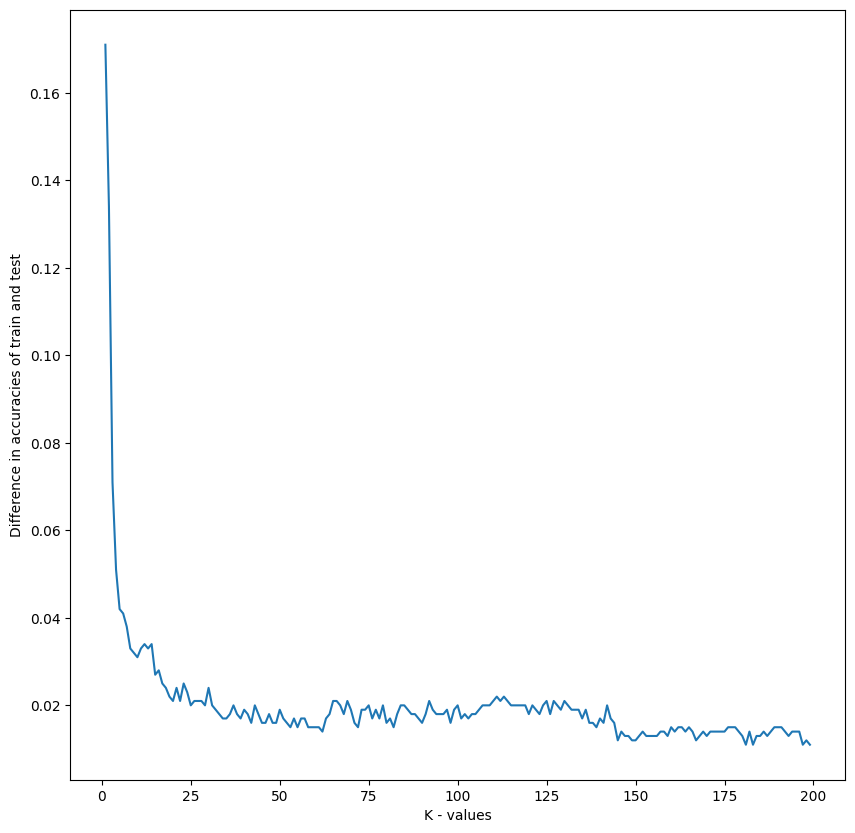

In [ ]:
plt.figure(figsize = (10, 10))
plt.plot(K_value, acc_test, acc_train)
plt.legend(["Test", "Train"])
plt.xlabel("K - values")
plt.ylabel("Accuracy score")
plt.show()

plt.figure(figsize = (10, 10))
plt.plot(K_value, diff)
plt.xlabel("K - values")
plt.ylabel("Difference in accuracies of train and test")
plt.show()

In [ ]:
max(acc_test)

0.863

In [ ]:
k = acc_test.index(max(acc_test))
k

7

In [ ]:
acc_test[k]

0.863

In [ ]:
knn = KNeighborsClassifier(n_neighbors = k + 1)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
print(np.round(accuracy_score(y_test,pred),3))

0.863
